In [183]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [184]:
df_fin = pd.read_csv("D:\Python\WebApp\MLC_Finances_Eng_Final_UTF8.csv")
df_att = pd.read_csv("D:\Python\WebApp\MLC_Attendance_Eng_FInal_UTF8.csv")

### use condensed to get summary statistics, split using the credit/debit column
df_fin2 = pd.read_csv("D:\Python\WebApp\MLC_Finances_Eng_Condensed_UTF8_V2.csv")

In [185]:
print(df_fin.size)
print(df_att.size)


14982
16668


In [186]:
df_fin.describe()

,Sum,Arkhipov,Arkhipov USD,Ventsel
count,1362.000000,1119.000000,64.000000,322.000000
mean,0.000000,0.000000,0.000000,0.000000
std,4709.803635,4751.131381,112.048176,3927.837722
min,-28800.000000,-28800.000000,-523.000000,-15000.000000
25%,-2000.000000,-2082.000000,-2.000000,-1300.000000
50%,200.000000,200.000000,-2.000000,0.000000
75%,2300.000000,2500.000000,40.000000,1287.500000
max,30300.000000,30300.000000,250.000000,19250.000000


In [187]:
df_att.describe()

,Date_Start,Date_End,Year,Attendance
count,926.000000,926.00000,926.000000,926.000000
mean,15.757019,15.75486,2017.514039,7.568035
std,8.732315,8.72346,2.352989,5.050364
min,1.000000,1.00000,2013.000000,0.000000
25%,8.000000,8.00000,2016.000000,4.000000
50%,16.000000,16.00000,2017.000000,7.000000
75%,23.000000,23.00000,2020.000000,10.000000
max,31.000000,31.00000,2022.000000,31.000000


In [188]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Operation       1362 non-null   object 
 1   Classification  1362 non-null   object 
 2   Sum             1362 non-null   int64  
 3   Category        1362 non-null   object 
 4   Date            1362 non-null   object 
 5   Owner           1362 non-null   object 
 6   Commentary Eng  1269 non-null   object 
 7   Commentary      1268 non-null   object 
 8   Arkhipov        1119 non-null   float64
 9   Arkhipov USD    64 non-null     float64
 10  Ventsel         322 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 117.2+ KB


In [189]:
df_fin['Date'] = pd.to_datetime(df_fin['Date'], format='%d/%m/%Y', errors='coerce')


In [190]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Operation       1362 non-null   object        
 1   Classification  1362 non-null   object        
 2   Sum             1362 non-null   int64         
 3   Category        1362 non-null   object        
 4   Date            1359 non-null   datetime64[ns]
 5   Owner           1362 non-null   object        
 6   Commentary Eng  1269 non-null   object        
 7   Commentary      1268 non-null   object        
 8   Arkhipov        1119 non-null   float64       
 9   Arkhipov USD    64 non-null     float64       
 10  Ventsel         322 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 117.2+ KB


In [191]:
df_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             926 non-null    object
 1   Status           926 non-null    object
 2   Type             926 non-null    object
 3   Creator          926 non-null    object
 4   Date             926 non-null    object
 5   Day_Start        926 non-null    object
 6   Day_End          926 non-null    object
 7   Month_Start      926 non-null    object
 8   Month_Finish     926 non-null    object
 9   Date_Start       926 non-null    int64 
 10  Date_End         926 non-null    int64 
 11  Year             926 non-null    int64 
 12  Time_Start       926 non-null    object
 13  Duration         926 non-null    object
 14  Location         926 non-null    object
 15  Going            926 non-null    object
 16  Attendance       926 non-null    int64 
 17  Date_Date_Excel  926 non-null    ob

In [192]:
df_att.head()

,Name,Status,Type,Creator,Date,Day_Start,Day_End,Month_Start,Month_Finish,Date_Start,Date_End,Year,Time_Start,Duration,Location,Going,Attendance,Date_Date_Excel
0,Saturday Practice,Completed,Team Practice,Eugene Arkhipov,"SATURDAY, NOVEMBER 2, 2013 AT 4 PM UTC+03",SATURDAY,SATURDAY,NOVEMBER,November,2,2,2013,4:00 PM,Duration: 3 hr,"ул. Флотская, 11а, москва",No Data,7,"Saturday, November 2, 2013"
1,Sunday Practice,Completed,Team Practice,Eugene Arkhipov,"SUNDAY, NOVEMBER 3, 2013 AT 11:45 AM UTC+03",SUNDAY,SUNDAY,NOVEMBER,November,3,3,2013,11:45 AM,Duration: 3 hr,"ул. Флотская, 11а, москва",No Data,5,"Sunday, November 3, 2013"
2,Monday Practice,Completed,Team Practice,Eugene Arkhipov,"MONDAY, NOVEMBER 4, 2013 AT 12 PM UTC+03",MONDAY,MONDAY,NOVEMBER,November,4,4,2013,12:00 PM,Duration: 3 hr,"ул. Флотская, 11а, москва",No Data,3,"Monday, November 4, 2013"
3,Saturday Practice,Completed,Team Practice,Eugene Arkhipov,"SATURDAY, NOVEMBER 9, 2013 AT 4 PM UTC+03",SATURDAY,SATURDAY,NOVEMBER,November,9,9,2013,4:00 PM,Duration: 3 hr,"ул. Флотская, 11а, москва",No Data,11,"Saturday, November 9, 2013"
4,Sunday Practice,Completed,Team Practice,Eugene Arkhipov,"SUNDAY, NOVEMBER 10, 2013 AT 11:45 AM UTC+03",SUNDAY,SUNDAY,NOVEMBER,November,10,10,2013,11:45 AM,Duration: 3 hr,"ул. Флотская, 11а, москва",No Data,11,"Sunday, November 10, 2013"


In [193]:
#from IPython.display import display

# Display the entire DataFrame
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(df_fin)


In [194]:
df_fin.head()

,Operation,Classification,Sum,Category,Date,Owner,Commentary Eng,Commentary,Arkhipov,Arkhipov USD,Ventsel
0,Head Purchase,Debit,-10000,Equipment,2015-08-01,Arkhipov,Denis for Heads,Дену за Headы,-10000.0,NaN,0.0
1,Membership Fee,Credit,29000,Membership Fee,2015-08-01,Arkhipov,Balance Remainder Arkhipov,Остаток у Arkhipovа,29000.0,NaN,0.0
2,Stick Sale,Credit,3000,Equipment,2015-08-01,Ventsel,NaN,NaN,0.0,NaN,3000.0
3,Stick Sale,Credit,3000,Equipment,2015-08-01,Ventsel,NaN,NaN,0.0,NaN,3000.0
4,Stick Sale,Credit,3000,Equipment,2015-08-01,Ventsel,NaN,NaN,0.0,NaN,3000.0


Financial Exploratory analysis General

split main database into 2 seperate databases based on currency

In [195]:
# Create separate DataFrames for Credit/Debit and Credit USD/Debit USD transactions
df_fin_usd = df_fin[df_fin['Classification'].str.contains('USD')]
df_fin_rub = df_fin[~df_fin['Classification'].str.contains('USD')]




In [196]:
df_fin_rub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1298 entries, 0 to 1361
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Operation       1298 non-null   object        
 1   Classification  1298 non-null   object        
 2   Sum             1298 non-null   int64         
 3   Category        1298 non-null   object        
 4   Date            1295 non-null   datetime64[ns]
 5   Owner           1298 non-null   object        
 6   Commentary Eng  1205 non-null   object        
 7   Commentary      1204 non-null   object        
 8   Arkhipov        1119 non-null   float64       
 9   Arkhipov USD    0 non-null      float64       
 10  Ventsel         322 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 121.7+ KB


In [197]:
df_fin_usd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 592 to 1355
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Operation       64 non-null     object        
 1   Classification  64 non-null     object        
 2   Sum             64 non-null     int64         
 3   Category        64 non-null     object        
 4   Date            64 non-null     datetime64[ns]
 5   Owner           64 non-null     object        
 6   Commentary Eng  64 non-null     object        
 7   Commentary      64 non-null     object        
 8   Arkhipov        0 non-null      float64       
 9   Arkhipov USD    64 non-null     float64       
 10  Ventsel         0 non-null      float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 6.0+ KB


In [198]:
# Display the two separate DataFrames
df_fin_usd.head()

,Operation,Classification,Sum,Category,Date,Owner,Commentary Eng,Commentary,Arkhipov,Arkhipov USD,Ventsel
592,Savings,Credit USD,250,Equipment,2018-06-26,Arkhipov USD,money set aside for FIL fee/equipment purchase,деньги отложенны за FIL Fee/equipment purchase,NaN,250.0,NaN
660,Elbows Purchase,Debit USD,-250,Equipment,2019-06-14,Arkhipov USD,elbow pads (270 usd total),elbow pads (270 USD total),NaN,-250.0,NaN
1059,Gloves Sale,Credit USD,40,Equipment,2021-05-06,Arkhipov USD,"Oleg, brine king gloves","Oleg, brine king gloves",NaN,40.0,NaN
1060,Shafts Sale,Credit USD,50,Equipment,2021-05-06,Arkhipov USD,"Oleg, brine triumph shaft","Oleg, brine triumph shaft",NaN,50.0,NaN
1061,Strings Sale,Credit USD,20,Equipment,2021-05-06,Arkhipov USD,"20 usd money mesh, Misha p","20 usd money mesh, Misha p",NaN,20.0,NaN


In [199]:
df_fin_rub.head()

,Operation,Classification,Sum,Category,Date,Owner,Commentary Eng,Commentary,Arkhipov,Arkhipov USD,Ventsel
0,Head Purchase,Debit,-10000,Equipment,2015-08-01,Arkhipov,Denis for Heads,Дену за Headы,-10000.0,NaN,0.0
1,Membership Fee,Credit,29000,Membership Fee,2015-08-01,Arkhipov,Balance Remainder Arkhipov,Остаток у Arkhipovа,29000.0,NaN,0.0
2,Stick Sale,Credit,3000,Equipment,2015-08-01,Ventsel,NaN,NaN,0.0,NaN,3000.0
3,Stick Sale,Credit,3000,Equipment,2015-08-01,Ventsel,NaN,NaN,0.0,NaN,3000.0
4,Stick Sale,Credit,3000,Equipment,2015-08-01,Ventsel,NaN,NaN,0.0,NaN,3000.0


Calculate the total sum spent on each category:

In [200]:
category_sums_usd = df_fin_usd.groupby('Category')['Sum'].sum()
print(category_sums_usd)

Category
Equipment    1046
Payout      -1046
Name: Sum, dtype: int64


In [201]:
category_sums_rub = df_fin_rub.groupby('Category')['Sum'].sum()
print(category_sums_rub)

Category
Accounting Services             -12430
Digital Services                -33936
Equipment                       126939
Event                             5800
Field                            36489
Fine                              1000
Interest Payment                  1290
Internal Transfer                    0
International Membership Fee    -90659
Legal Services                  -40850
Loan                               650
Logistical Debits               -26151
Logistical Fees                  -5000
Marketing                        -4900
Membership Fee                  147400
Misc                             -7742
Payout                          -97900
Name: Sum, dtype: int64


Calculate the number of transactions for each category:

In [202]:
category_transaction_counts_rub = df_fin_rub['Category'].value_counts()
print(category_transaction_counts_rub)

Equipment                       559
Field                           538
Membership Fee                   97
Logistical Debits                30
Digital Services                 19
Internal Transfer                10
Legal Services                    9
International Membership Fee      7
Loan                              6
Payout                            6
Marketing                         4
Accounting Services               4
Misc                              4
Event                             2
Logistical Fees                   1
Fine                              1
Interest Payment                  1
Name: Category, dtype: int64


In [251]:
# Group the DataFrame by 'Category' and 'Date' and calculate the sum of 'Sum' and the count of transactions
category_sum_over_time = df_fin_rub.groupby(['Category', 'Date'])['Sum'].sum().reset_index()
category_count_over_time = df_fin_rub.groupby(['Category', 'Date']).size().reset_index(name='Count')

# Create a line graph for the sum of transactions over time for each category
fig_sum_over_time = px.line(category_sum_over_time, x='Date', y='Sum', color='Category',
                            title='Sum of Transactions Over Time (RUB)')

# Create a line graph for the number of transactions over time for each category
fig_count_over_time = px.line(category_count_over_time, x='Date', y='Count', color='Category',
                              title='Number of Transactions Over Time (RUB)')

# Show the interactive graphs
fig_sum_over_time.show()
fig_count_over_time.show()


###########################add graph (transactions/time)

In [203]:
category_transaction_counts_usd = df_fin_usd['Category'].value_counts()
print(category_transaction_counts_usd)

Equipment    62
Payout        2
Name: Category, dtype: int64


"category" analysis:

In [204]:
category_classification_counts_rub = df_fin_rub.groupby(['Category', 'Classification'])['Operation'].count()
print(category_classification_counts_rub)

Category                      Classification
Accounting Services           Debit               4
Digital Services              Debit              19
Equipment                     Credit            330
                              Debit             229
Event                         Credit              2
Field                         Credit            292
                              Debit             246
Fine                          Credit              1
Interest Payment              Credit              1
Internal Transfer             Credit              5
                              Debit               5
International Membership Fee  Debit               7
Legal Services                Debit               9
Loan                          Credit              3
                              Debit               3
Logistical Debits             Debit              30
Logistical Fees               Debit               1
Marketing                     Debit               4
Membership Fee     

In [205]:
category_classification_counts_usd = df_fin_usd.groupby(['Category', 'Classification'])['Operation'].count()
print(category_classification_counts_usd)

Category   Classification
Equipment  Credit USD        30
           Debit USD         32
Payout     Debit USD          2
Name: Operation, dtype: int64


category totals

In [206]:
category_summary_rub = df_fin_rub.groupby('Category').agg({'Sum': ['sum', 'count']})
category_summary_rub.columns = ['Total Sum', 'Number of Transactions']
category_summary_rub = category_summary_rub.reset_index()

category_summary_rub['Profit/Loss per Transaction'] = category_summary_rub['Total Sum'] / category_summary_rub['Number of Transactions']


print(category_summary_rub)

                        Category  Total Sum  Number of Transactions  \
0            Accounting Services     -12430                       4   
1               Digital Services     -33936                      19   
2                      Equipment     126939                     559   
3                          Event       5800                       2   
4                          Field      36489                     538   
5                           Fine       1000                       1   
6               Interest Payment       1290                       1   
7              Internal Transfer          0                      10   
8   International Membership Fee     -90659                       7   
9                 Legal Services     -40850                       9   
10                          Loan        650                       6   
11             Logistical Debits     -26151                      30   
12               Logistical Fees      -5000                       1   
13    

In [207]:
# Sort the DataFrame by 'Total Sum' in descending order and select the top 10 rows
top_10_total_sum_rub = category_summary_rub.sort_values(by='Total Sum', ascending=False).head(10)

# Create a horizontal bar graph for 'Total Sum'
fig_total_sum_rub = px.bar(top_10_total_sum_rub, x='Category', y='Total Sum',
                      title='Top 10 Categories by Total Sum (RUB)')

# Create a horizontal bar graph for 'Number of Transactions'
top_10_transactions_rub = category_summary_rub.sort_values(by='Number of Transactions', ascending=False).head(10)
fig_transactions_rub = px.bar(top_10_transactions_rub, x='Category', y='Number of Transactions',
                          title='Top 10 Categories by Number of Transactions')

# Create a horizontal bar graph for 'Profit/Loss per Transaction'
top_10_profit_loss_rub = category_summary_rub.sort_values(by='Profit/Loss per Transaction', ascending=False).head(10)
fig_profit_loss_rub = px.bar(top_10_profit_loss_rub, x='Category', y='Profit/Loss per Transaction',
                        title='Top 10 Categories by Profit/Loss per Transaction (RUB)')

# Show the interactive graphs
fig_total_sum_rub.show()
fig_transactions_rub.show()
fig_profit_loss_rub.show()


In [208]:
category_summary_usd = df_fin_usd.groupby('Category').agg({'Sum': ['sum', 'count']})
category_summary_usd.columns = ['Total Sum', 'Number of Transactions']
category_summary_usd = category_summary_usd.reset_index()

category_summary_usd['Profit/Loss per Transaction'] = category_summary_usd['Total Sum'] / category_summary_usd['Number of Transactions']

print(category_summary_usd)

    Category  Total Sum  Number of Transactions  Profit/Loss per Transaction
0  Equipment       1046                      62                    16.870968
1     Payout      -1046                       2                  -523.000000


In [209]:
# Sort the DataFrame by 'Total Sum' in descending order and select the top 10 rows
top_10_total_sum_usd = category_summary_usd.sort_values(by='Total Sum', ascending=False).head(10)

# Create a horizontal bar graph for 'Total Sum'
fig_total_sum_usd = px.bar(top_10_total_sum_usd, x='Category', y='Total Sum',
                      title='Top 10 Categories by Total Sum (usd)')

# Create a horizontal bar graph for 'Number of Transactions'
top_10_transactions_usd = category_summary_usd.sort_values(by='Number of Transactions', ascending=False).head(10)
fig_transactions_usd = px.bar(top_10_transactions_usd, x='Category', y='Number of Transactions',
                          title='Top 10 Categories by Number of Transactions')

# Create a horizontal bar graph for 'Profit/Loss per Transaction'
top_10_profit_loss_usd = category_summary_usd.sort_values(by='Profit/Loss per Transaction', ascending=False).head(10)
fig_profit_loss_usd = px.bar(top_10_profit_loss_usd, x='Category', y='Profit/Loss per Transaction',
                        title='Top 10 Categories by Profit/Loss per Transaction (usd)')

# Show the interactive graphs
fig_total_sum_usd.show()
fig_transactions_usd.show()
fig_profit_loss_usd.show()

group by operation

In [210]:
operation_summary_rub = df_fin_rub.groupby('Operation').agg({'Sum': ['sum', 'count']})
operation_summary_rub.columns = ['Total Sum', 'Number of Transactions']
operation_summary_rub = operation_summary_rub.reset_index()

# Calculate the Total Sum per Transaction
operation_summary_rub['Profit/Loss per Transaction'] = operation_summary_rub['Total Sum'] / operation_summary_rub['Number of Transactions']

print(operation_summary_rub)

             Operation  Total Sum  Number of Transactions  \
0        Ball Purchase      -4800                      32   
1       Ball Purchases      -2700                       1   
2            Ball Sale      20450                      96   
3               Credit       1290                       1   
4      Elbows Purchase     -42708                      23   
5          Elbows Sale      49350                      27   
6   Equipment Purchase     -68002                      26   
7       Equipment Sale      35180                      25   
8           Field Fees    1430805                     288   
9         Field Rental   -1405060                     244   
10     Gloves Purchase     -38900                      26   
11         Gloves Sale      54650                      24   
12       Head Purchase     -36488                      17   
13           Head Sale      61600                      21   
14     Helmet Purchase     -47296                      23   
15         Helmet Sale  

In [211]:
operation_summary_usd = df_fin_usd.groupby('Operation').agg({'Sum': ['sum', 'count']})
operation_summary_usd.columns = ['Total Sum', 'Number of Transactions']
operation_summary_usd = operation_summary_usd.reset_index()

# Calculate the Total Sum per Transaction
operation_summary_usd['Profit/Loss per Transaction'] = operation_summary_usd['Total Sum'] / operation_summary_usd['Number of Transactions']

print(operation_summary_usd)

           Operation  Total Sum  Number of Transactions  \
0     Ball Purchases       -181                       1   
1    Elbows Purchase       -250                       1   
2        Elbows Sale         80                       2   
3     Equipment Sale          5                       1   
4        Gloves Sale        195                       6   
5          Head Sale        310                       7   
6        Helmet Sale        240                       5   
7             Payout      -1046                       2   
8      Reimbursement        181                       1   
9            Savings        250                       1   
10       Shafts Sale        259                       5   
11  Strings Purchase        -68                      30   
12      Strings Sale         25                       2   

    Profit/Loss per Transaction  
0                   -181.000000  
1                   -250.000000  
2                     40.000000  
3                      5.000000  
4  

"operation" analysis

identify totals for operation variables 

In [212]:
# Create variables for each pair/group of usd operations
ball_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Ball Purchase', 'Ball Sale', 'Ball Purchases']), 'Sum'].sum()
elbows_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Elbows Purchase', 'Elbows Sale']), 'Sum'].sum()
equipment_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Equipment Purchase', 'Equipment Sale']), 'Sum'].sum()
field_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Field Fees', 'Field Rental']), 'Sum'].sum()
gloves_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Gloves Purchase', 'Gloves Sale']), 'Sum'].sum()
head_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Head Purchase', 'Head Sale']), 'Sum'].sum()
helmet_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Helmet Purchase', 'Helmet Sale']), 'Sum'].sum()
loan_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Loan Issuance', 'Loan Repayment', 'Loan']), 'Sum'].sum()
membership_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Membership Fee', 'Membership Fee EFL', 'Membership Fee FIL']), 'Sum'].sum()
shafts_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Shafts Purchase', 'Shafts Sale']), 'Sum'].sum()
stick_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Stick Sale', 'Sticks Purchase']), 'Sum'].sum()
strings_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['Strings Purchase', 'Strings Sale']), 'Sum'].sum()
t_shirt_total_usd = df_fin_usd.loc[df_fin_usd['Operation'].isin(['T-Shirt Sale', 'T-Shirts Purchase']), 'Sum'].sum()

In [213]:
# Create variables for each pair/group of rub operations
ball_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Ball Purchase', 'Ball Sale', 'Ball Purchases']), 'Sum'].sum()
elbows_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Elbows Purchase', 'Elbows Sale']), 'Sum'].sum()
equipment_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Equipment Purchase', 'Equipment Sale']), 'Sum'].sum()
field_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Field Fees', 'Field Rental']), 'Sum'].sum()
gloves_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Gloves Purchase', 'Gloves Sale']), 'Sum'].sum()
head_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Head Purchase', 'Head Sale']), 'Sum'].sum()
helmet_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Helmet Purchase', 'Helmet Sale']), 'Sum'].sum()
loan_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Loan Issuance', 'Loan Repayment', 'Loan']), 'Sum'].sum()
membership_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Membership Fee', 'Membership Fee EFL', 'Membership Fee FIL']), 'Sum'].sum()
shafts_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Shafts Purchase', 'Shafts Sale']), 'Sum'].sum()
stick_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Stick Sale', 'Sticks Purchase']), 'Sum'].sum()
strings_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Strings Purchase', 'Strings Sale']), 'Sum'].sum()
t_shirt_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['T-Shirt Sale', 'T-Shirts Purchase']), 'Sum'].sum()

In [214]:
# Create variables for usd operations without partners
bank_interest_usd = df_fin_usd.loc[df_fin_usd['Operation'] == 'Credit', 'Sum'].sum()
materials_purchase_usd = df_fin_usd.loc[df_fin_usd['Operation'] == 'Materials Purchase', 'Sum'].sum()
lacrosse_clinic_usd = df_fin_usd.loc[df_fin_usd['Operation'] == 'Lacrosse Clinic', 'Sum'].sum()

In [215]:
# Create variables for rub operations without partners
bank_interest_rub = df_fin_rub.loc[df_fin_rub['Operation'] == 'Credit', 'Sum'].sum()
materials_purchase_rub = df_fin_rub.loc[df_fin_rub['Operation'] == 'Materials Purchase', 'Sum'].sum()
lacrosse_clinic_rub = df_fin_rub.loc[df_fin_rub['Operation'] == 'Lacrosse Clinic', 'Sum'].sum()

In [216]:
# Add addditonal totals for usd
order_refund_total_usd = df_fin_usd.loc[df_fin_usd['Operation'] == 'Order Refund', 'Sum'].sum()
payment_total_usd = df_fin_usd.loc[df_fin_usd['Operation'] == 'Payment', 'Sum'].sum()
payout_total_usd = df_fin_usd.loc[df_fin_usd['Operation'] == 'Payout', 'Sum'].sum()
player_fine_total_usd = df_fin_usd.loc[df_fin_usd['Operation'] == 'Player Fine', 'Sum'].sum()
reimbursement_total_usd = df_fin_usd.loc[df_fin_usd['Operation'] == 'Reimbursement', 'Sum'].sum()
shoulders_sale_total_usd = df_fin_usd.loc[df_fin_usd['Operation'] == 'Shoulders Sale', 'Sum'].sum()
transfer_to_artur_total_usd = df_fin_usd.loc[df_fin_usd['Operation'] == 'Transfer to Artur', 'Sum'].sum()

In [217]:
# Add addditonal totals for rub
order_refund_total_rub = df_fin_rub.loc[df_fin_rub['Operation'] == 'Order Refund', 'Sum'].sum()
payment_total_rub = df_fin_rub.loc[df_fin_rub['Operation'] == 'Payment', 'Sum'].sum()
payout_total_rub = df_fin_rub.loc[df_fin_rub['Operation'] == 'Payout', 'Sum'].sum()
player_fine_total_rub = df_fin_rub.loc[df_fin_rub['Operation'] == 'Player Fine', 'Sum'].sum()
reimbursement_total_rub = df_fin_rub.loc[df_fin_rub['Operation'] == 'Reimbursement', 'Sum'].sum()
shoulders_sale_total_rub = df_fin_rub.loc[df_fin_rub['Operation'] == 'Shoulders Sale', 'Sum'].sum()
transfer_to_artur_total_rub = df_fin_rub.loc[df_fin_rub['Operation'] == 'Transfer to Artur', 'Sum'].sum()

totals:

ball_total_usd
elbows_total_usd
equipment_total_usd
field_total_usd
gloves_total_usd
head_total_usd
helmet_total_usd
loan_total_usd
shafts_total_usd
stick_total_usd
strings_total_usd
t_shirt_total_usd
membership_total_usd
order_refund_total_usd
payment_total_usd
payout_total_usd
player_fine_total_usd
reimbursement_total_usd
shoulders_sale_total_usd
transfer_to_artur_total_usd
bank_interest_usd
materials_purchase_usd
lacrosse_clinic_usd

In [218]:
# Display the total sums for each usd operation
print("Ball Total USD:", ball_total_usd)
print("Elbows Total USD:", elbows_total_usd)
print("Equipment Total USD:", equipment_total_usd)
print("Field Total USD:", field_total_usd)
print("Gloves Total USD:", gloves_total_usd)
print("Head Total USD:", head_total_usd)
print("Helmet Total USD:", helmet_total_usd)
print("Loan Total USD:", loan_total_usd)
print("Shafts Total USD:", shafts_total_usd)
print("Stick Total USD:", stick_total_usd)
print("Strings Total USD:", strings_total_usd)
print("T-Shirt Total USD:", t_shirt_total_usd)
print("Membership Fee Total USD:", membership_total_usd)
print("Order Refund Total USD:", order_refund_total_usd)
print("Payment Total USD:", payment_total_usd)
print("Payout Total USD:", payout_total_usd)
print("Player Fine Total USD:", player_fine_total_usd)
print("Reimbursement Total USD:", reimbursement_total_usd)
print("Shoulders Sale Total USD:", shoulders_sale_total_usd)
print("Transfer to Artur Total USD:", transfer_to_artur_total_usd)
print("Bank Interest USD:", bank_interest_usd)
print("Materials Purchase USD:", materials_purchase_usd)
print("Lacrosse Clinic USD:", lacrosse_clinic_usd)


Ball Total USD: -181
Elbows Total USD: -170
Equipment Total USD: 5
Field Total USD: 0
Gloves Total USD: 195
Head Total USD: 310
Helmet Total USD: 240
Loan Total USD: 0
Shafts Total USD: 259
Stick Total USD: 0
Strings Total USD: -43
T-Shirt Total USD: 0
Membership Fee Total USD: 0
Order Refund Total USD: 0
Payment Total USD: 0
Payout Total USD: -1046
Player Fine Total USD: 0
Reimbursement Total USD: 181
Shoulders Sale Total USD: 0
Transfer to Artur Total USD: 0
Bank Interest USD: 0
Materials Purchase USD: 0
Lacrosse Clinic USD: 0


In [219]:
# Display the total sums for each rub operation
print("Ball Total RUB:", ball_total_rub)
print("Elbows Total RUB:", elbows_total_rub)
print("Equipment Total RUB:", equipment_total_rub)
print("Field Total RUB:", field_total_rub)
print("Gloves Total RUB:", gloves_total_rub)
print("Head Total RUB:", head_total_rub)
print("Helmet Total RUB:", helmet_total_rub)
print("Loan Total RUB:", loan_total_rub)
print("Shafts Total RUB:", shafts_total_rub)
print("Stick Total RUB:", stick_total_rub)
print("Strings Total RUB:", strings_total_rub)
print("T-Shirt Total RUB:", t_shirt_total_rub)
print("Membership Fee Total RUB:", membership_total_rub)
print("Order Refund Total RUB:", order_refund_total_rub)
print("Payment Total RUB:", payment_total_rub)
print("Payout Total RUB:", payout_total_rub)
print("Player Fine Total RUB:", player_fine_total_rub)
print("Reimbursement Total RUB:", reimbursement_total_rub)
print("Shoulders Sale Total RUB:", shoulders_sale_total_rub)
print("Transfer to Artur Total RUB:", transfer_to_artur_total_rub)
print("Bank Interest RUB:", bank_interest_rub)
print("Materials Purchase RUB:", materials_purchase_rub)
print("Lacrosse Clinic RUB:", lacrosse_clinic_rub)


Ball Total RUB: 12950
Elbows Total RUB: 6642
Equipment Total RUB: -32822
Field Total RUB: 25745
Gloves Total RUB: 15750
Head Total RUB: 25112
Helmet Total RUB: 28404
Loan Total RUB: 650
Shafts Total RUB: -19960
Stick Total RUB: 60854
Strings Total RUB: 8761
T-Shirt Total RUB: 171
Membership Fee Total RUB: 60285
Order Refund Total RUB: 14577
Payment Total RUB: -128859
Payout Total RUB: -97900
Player Fine Total RUB: 1000
Reimbursement Total RUB: 12950
Shoulders Sale Total RUB: 1000
Transfer to Artur Total RUB: 0
Bank Interest RUB: 1290
Materials Purchase RUB: -2400
Lacrosse Clinic RUB: 5800


In [220]:
# Calculate the total sums for each operation
total_sums = [
    ("Ball", ball_total_rub),
    ("Elbows", elbows_total_rub),
    ("Equipment", equipment_total_rub),
    ("Field", field_total_rub),
    ("Gloves", gloves_total_rub),
    ("Head", head_total_rub),
    ("Helmet", helmet_total_rub),
    ("Loan", loan_total_rub),
    ("Membership", membership_total_rub),
    ("Shafts", shafts_total_rub),
    ("Stick", stick_total_rub),
    ("Strings", strings_total_rub),
    ("T-Shirt", t_shirt_total_rub),
]

# Create a DataFrame
df_total_sums_rub = pd.DataFrame(total_sums, columns=["Operation", "Total Sum"])

# Sort the DataFrame by Total Sum in descending order
df_total_sums_rub  = df_total_sums_rub .sort_values(by="Total Sum", ascending=False)

# Select the top 25 rows
top_25_total_sums = df_total_sums_rub .head(25)

# Create a bar graph
fig = px.bar(
    top_25_total_sums,
    x="Operation",
    y="Total Sum",
    labels={"Total Sum": "Total Sum (RUB)"},
    title="Top 25 Profit for Rub Operations",
)

# Show the graph
fig.show()


In [221]:
# Group the data by 'Operation' and sum the 'Sum' values for each group
operation_summary_rub = df_fin_rub.groupby('Operation')['Sum'].sum().reset_index()

# Sort the data in descending order by the 'Sum' column and get the top 10 rows
top_10_operations = operation_summary_rub.sort_values(by='Sum', ascending=False).head(10)

# Create a bar graph using Plotly Express
fig = px.bar(top_10_operations, x='Operation', y='Sum', title='Top 10 Operations by Total Sum (RUB)')

# Show the graph
fig.show()


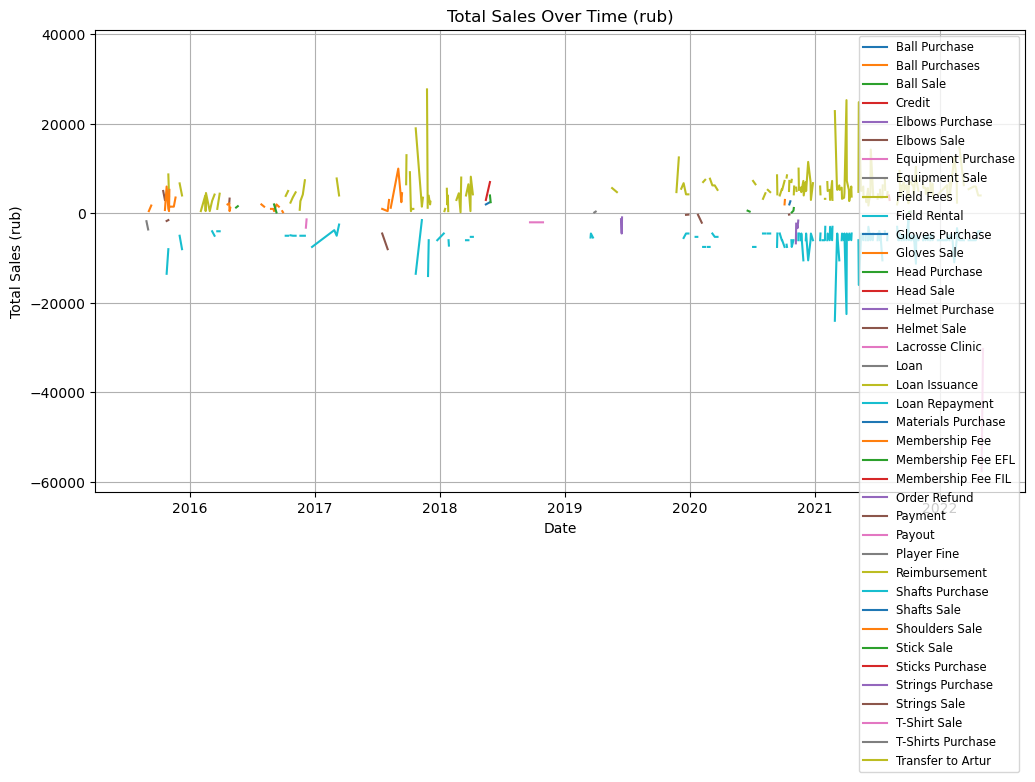

In [222]:
# Group the rub data by Date and the revenue variable and sum the "Sum" column
revenue_data_rub = df_fin_rub.groupby(['Date', 'Operation'])['Sum'].sum().unstack()

# Plot the data for each revenue variable
plt.figure(figsize=(12, 6))
for operation in revenue_data_rub.columns:
    plt.plot(revenue_data_rub.index, revenue_data_rub[operation], label=operation)

plt.xlabel('Date')
plt.ylabel('Total Sales (rub)')
plt.title('Total Sales Over Time (rub)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.show()

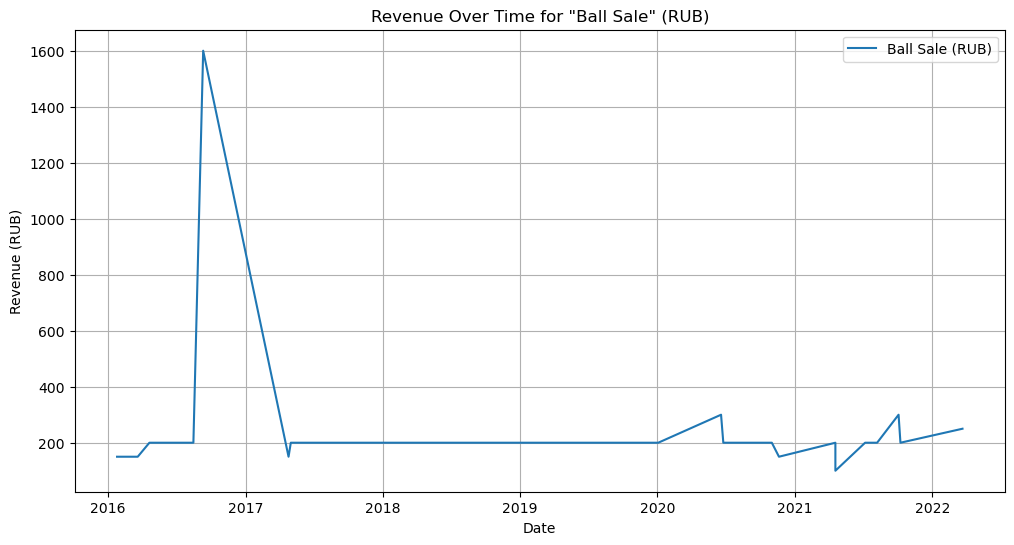

In [223]:
# Filter the data for a specific operation, e.g., "Ball Sale"
revenue_data_rub = df_fin_rub[df_fin_rub['Operation'] == 'Ball Sale']

# Plot the revenue data
plt.figure(figsize=(12, 6))
plt.plot(revenue_data_rub['Date'], revenue_data_rub['Sum'], label='Ball Sale (RUB)')

plt.xlabel('Date')
plt.ylabel('Revenue (RUB)')
plt.title('Revenue Over Time for "Ball Sale" (RUB)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


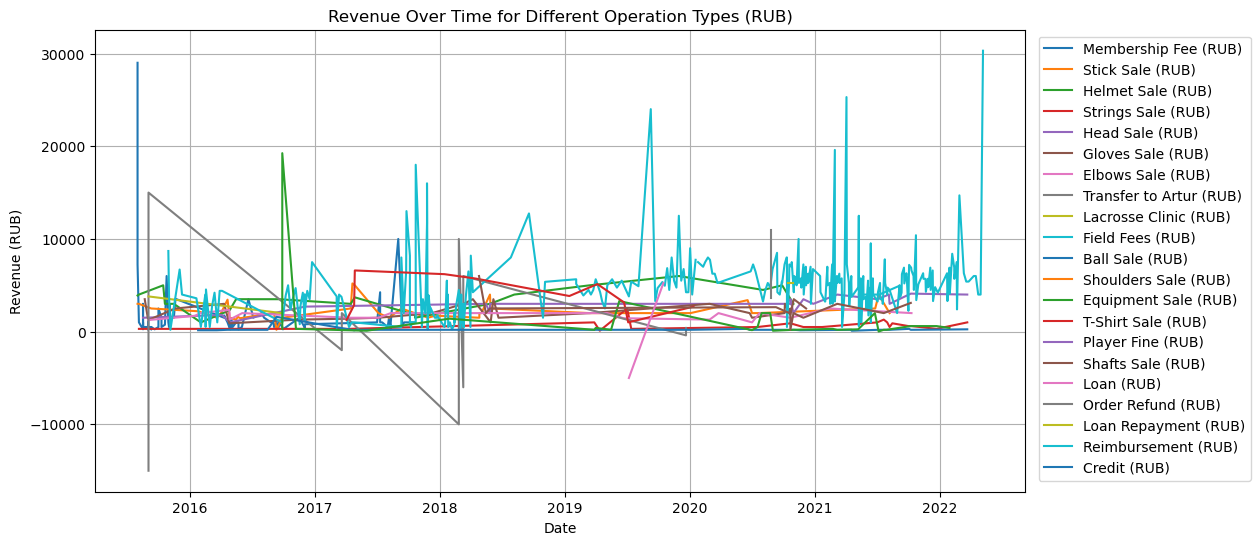

In [224]:
# Get the unique revenue operation types
revenue_operation_types = df_fin_rub[df_fin_rub['Sum'] > 0]['Operation'].unique()

# Plot line graphs for each revenue operation type
plt.figure(figsize=(12, 6))
for operation_type in revenue_operation_types:
    revenue_data_rub = df_fin_rub[df_fin_rub['Operation'] == operation_type]
    plt.plot(revenue_data_rub['Date'], revenue_data_rub['Sum'], label=f'{operation_type} (RUB)')

plt.xlabel('Date')
plt.ylabel('Revenue (RUB)')
plt.title('Revenue Over Time for Different Operation Types (RUB)')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()


In [225]:
import plotly.express as px

# Get the unique revenue operation types
revenue_operation_types = df_fin_rub[df_fin_rub['Sum'] > 0]['Operation'].unique()

# Create an interactive line graph for each revenue operation type
fig = px.line(df_fin_rub[df_fin_rub['Sum'] > 0], x='Date', y='Sum', color='Operation',
              labels={'Sum': 'Revenue (RUB)'}, title='Revenue Over Time for Different Operation Types (RUB)',
              category_orders={"Operation": revenue_operation_types})
fig.update_layout(
    legend_title_text='Operation Type',
    height=600,  # Change the height to your desired value
    width=1000  # Change the width to your desired value
)


# Show the interactive graph
fig.show()


In [226]:
# Top 5 Expense Operation Types in RUB (excluding "Payout")
top_expense_rub = df_fin_rub[df_fin_rub['Sum'] < 0]
top_expense_rub = top_expense_rub[top_expense_rub['Operation'] != 'Payout']
top_expense_rub = top_expense_rub.groupby('Operation')['Sum'].sum().nsmallest(5).reset_index()

# Reverse the sorting order
top_expense_rub = top_expense_rub.iloc[::-1]

# Create a horizontal bar graph with the highest value at the top
fig_expense_rub = px.bar(top_expense_rub, x='Sum', y='Operation', title='Top 5 Expense Operation Types (RUB)')

# Show or save the figure
fig_expense_rub.show()




In [227]:
# Top 5 Revenue Operation Types in RUB
top_revenue_rub = df_fin_rub[df_fin_rub['Sum'] > 0]
top_revenue_rub = top_revenue_rub.groupby('Operation')['Sum'].sum().nlargest(5).reset_index()

# Reverse the sorting order
top_revenue_rub = top_revenue_rub.iloc[::-1]

# Create a horizontal bar graph with the highest value at the top
fig_revenue_rub = px.bar(top_revenue_rub, x='Sum', y='Operation', title='Top 5 Revenue Operation Types (RUB)')

# Show or save the figure
fig_revenue_rub.show()


calculate turnover 


In [228]:
# Calculate the total turnover as the sum of absolute values of the "Sum" column
total_turnover_usd = df_fin_usd['Sum'].abs().sum()
total_turnover_rub = df_fin_rub['Sum'].abs().sum()

# Display the total turnover
print("Total Turnover (USD):", total_turnover_usd)
print("Total Turnover (RUB):", total_turnover_rub)

Total Turnover (USD): 3090
Total Turnover (RUB): 4378614


calculate revenue

In [229]:
# Calculate income and expenses for USD DataFrame
income_usd = df_fin_usd[df_fin_usd['Classification'].isin(['Credit', 'Credit USD'])]['Sum'].sum()
expenses_usd = df_fin_usd[df_fin_usd['Classification'].isin(['Debit', 'Debit USD'])]['Sum'].sum()

# Exclude "Payout Total USD"
expenses_usd -= payout_total_usd

# Display the results
print("Income USD:", income_usd)
print("Expenses USD:", expenses_usd)



Income USD: 1545
Expenses USD: -499


In [230]:
# Calculate income and expenses for RUB DataFrame
income_rub = df_fin_rub[df_fin_rub['Classification'].isin(['Credit', 'Credit USD'])]['Sum'].sum()
expenses_rub = df_fin_rub[df_fin_rub['Classification'].isin(['Debit', 'Debit USD'])]['Sum'].sum()

# Exclude "Payout Total RUB"
expenses_rub -= payout_total_rub

# Display the results
print("Income RUB:", income_rub)
print("Expenses RUB:", expenses_rub)


Income RUB: 2189307
Expenses RUB: -2091407


calculate profit

In [231]:
total_profit_rub = abs(payout_total_rub)
total_profit_usd = abs(payout_total_usd)



print(total_profit_usd)
print(total_profit_rub)

1046
97900


In [232]:
# Calculate profit margin (Profit as a percentage of income)
profit_margin_usd = (abs(payout_total_usd) / income_usd) * 100
profit_margin_rub = (abs(payout_total_rub) / income_rub) * 100


# Display the results for USD
print("Profit Margin (USD):", profit_margin_usd)
print("Profit Margin (RUB):", profit_margin_rub)



Profit Margin (USD): 67.70226537216828
Profit Margin (RUB): 4.4717346630691805


NEED TO IDENTIFY REVENUE FOR EACH CATEGORY AND REPLACE TOTAL_PROFIT_USD WITH EACH CATEGORY REVENUE

In [233]:
# Filter the USD data frame for the "Ball Purchase" and "Ball Purchases" operations
ball_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Ball Sale'])]
ball_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Ball Sale'])]

# Calculate the sum of the "Ball Purchase" and "Ball Purchases" operations in USD
ball_revenue_usd = ball_revenue_usd['Sum'].sum()
ball_revenue_rub = ball_revenue_rub['Sum'].sum()

print(ball_revenue_usd)
print(ball_revenue_rub)

0
20450


In [234]:
###test 
test = ball_total_rub / ball_revenue_rub

print(ball_total_rub)
print(ball_revenue_rub)
print(test)

12950
20450
0.6332518337408313


In [235]:
# Filter the USD data frame for the specified operations for each category
ball_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Ball Sale'])]['Sum'].sum()
elbows_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Elbows Sale'])]['Sum'].sum()
equipment_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Equipment Sale'])]['Sum'].sum()
gloves_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Gloves Sale'])]['Sum'].sum()
head_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Head Sale'])]['Sum'].sum()
helmet_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Helmet Sale'])]['Sum'].sum()
shafts_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Shafts Sale'])]['Sum'].sum()
stick_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Stick Sale'])]['Sum'].sum()
strings_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Strings Sale'])]['Sum'].sum()
t_shirt_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['T-Shirt Sale'])]['Sum'].sum()
order_refund_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Order Refund'])]['Sum'].sum()
membership_fee_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Membership Fee'])]['Sum'].sum()
player_fine_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Player Fine'])]['Sum'].sum()
reimbursement_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Reimbursement'])]['Sum'].sum()
shoulders_sale_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Shoulders Sale'])]['Sum'].sum()
loan_revenue_usd = (df_fin_usd[df_fin_usd['Operation'].isin(['Loan Repayment'])]['Sum'].sum()) + (df_fin_usd[df_fin_usd['Operation'].isin(['Loan'])]['Sum'].sum())
bank_interest_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Credit'])]['Sum'].sum()
lacrosse_clinic_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Lacrosse Clinic'])]['Sum'].sum()
field_revenue_usd = df_fin_usd[df_fin_usd['Operation'].isin(['Field Fees'])]['Sum'].sum()




In [236]:
# Display the revenue for each category in USD
print("Ball Revenue (USD): {:.2f}".format(ball_revenue_usd))
print("Elbows Revenue (USD): {:.2f}".format(elbows_revenue_usd))
print("Equipment Revenue (USD): {:.2f}".format(equipment_revenue_usd))
print("Gloves Revenue (USD): {:.2f}".format(gloves_revenue_usd))
print("Head Revenue (USD): {:.2f}".format(head_revenue_usd))
print("Helmet Revenue (USD): {:.2f}".format(helmet_revenue_usd))
print("Shafts Revenue (USD): {:.2f}".format(shafts_revenue_usd))
print("Stick Revenue (USD): {:.2f}".format(stick_revenue_usd))
print("Strings Revenue (USD): {:.2f}".format(strings_revenue_usd))
print("T-Shirt Revenue (USD): {:.2f}".format(t_shirt_revenue_usd))
print("Order Refund Revenue (USD): {:.2f}".format(order_refund_revenue_usd))
print("Membership Fee Revenue (USD): {:.2f}".format(membership_fee_revenue_usd))
print("Player Fine Revenue (USD): {:.2f}".format(player_fine_revenue_usd))
print("Reimbursement Revenue (USD): {:.2f}".format(reimbursement_revenue_usd))
print("Shoulders Sale Revenue (USD): {:.2f}".format(shoulders_sale_revenue_usd))
print("Loan Revenue (USD): {:.2f}".format(loan_revenue_usd))
print("Bank Interest Revenue (USD): {:.2f}".format(bank_interest_revenue_usd))
print("Lacrosse Clinic Revenue (USD): {:.2f}".format(lacrosse_clinic_revenue_usd))
print("Field Revenue (USD): {:.2f}".format(field_revenue_usd))


Ball Revenue (USD): 0.00
Elbows Revenue (USD): 80.00
Equipment Revenue (USD): 5.00
Gloves Revenue (USD): 195.00
Head Revenue (USD): 310.00
Helmet Revenue (USD): 240.00
Shafts Revenue (USD): 259.00
Stick Revenue (USD): 0.00
Strings Revenue (USD): 25.00
T-Shirt Revenue (USD): 0.00
Order Refund Revenue (USD): 0.00
Membership Fee Revenue (USD): 0.00
Player Fine Revenue (USD): 0.00
Reimbursement Revenue (USD): 181.00
Shoulders Sale Revenue (USD): 0.00
Loan Revenue (USD): 0.00
Bank Interest Revenue (USD): 0.00
Lacrosse Clinic Revenue (USD): 0.00
Field Revenue (USD): 0.00


In [237]:
# Filter the rub data frame for the specified operations for each category
ball_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Ball Sale'])]['Sum'].sum()
elbows_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Elbows Sale'])]['Sum'].sum()
equipment_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Equipment Sale'])]['Sum'].sum()
gloves_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Gloves Sale'])]['Sum'].sum()
head_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Head Sale'])]['Sum'].sum()
helmet_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Helmet Sale'])]['Sum'].sum()
shafts_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Shafts Sale'])]['Sum'].sum()
stick_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Stick Sale'])]['Sum'].sum()
strings_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Strings Sale'])]['Sum'].sum()
t_shirt_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['T-Shirt Sale'])]['Sum'].sum()
order_refund_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Order Refund'])]['Sum'].sum()
membership_fee_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Membership Fee'])]['Sum'].sum()
player_fine_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Player Fine'])]['Sum'].sum()
reimbursement_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Reimbursement'])]['Sum'].sum()
shoulders_sale_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Shoulders Sale'])]['Sum'].sum()
loan_revenue_rub = (df_fin_rub[df_fin_rub['Operation'].isin(['Loan Repayment'])]['Sum'].sum()) + (df_fin_rub[df_fin_rub['Operation'].isin(['Loan'])]['Sum'].sum())
bank_interest_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Credit'])]['Sum'].sum()
lacrosse_clinic_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Lacrosse Clinic'])]['Sum'].sum()
field_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Field Fees'])]['Sum'].sum()

In [238]:
# Display the revenue for each category in rub
print("Ball Revenue (rub): {:.2f}".format(ball_revenue_rub))
print("Elbows Revenue (rub): {:.2f}".format(elbows_revenue_rub))
print("Equipment Revenue (rub): {:.2f}".format(equipment_revenue_rub))
print("Gloves Revenue (rub): {:.2f}".format(gloves_revenue_rub))
print("Head Revenue (rub): {:.2f}".format(head_revenue_rub))
print("Helmet Revenue (rub): {:.2f}".format(helmet_revenue_rub))
print("Shafts Revenue (rub): {:.2f}".format(shafts_revenue_rub))
print("Stick Revenue (rub): {:.2f}".format(stick_revenue_rub))
print("Strings Revenue (rub): {:.2f}".format(strings_revenue_rub))
print("T-Shirt Revenue (rub): {:.2f}".format(t_shirt_revenue_rub))
print("Order Refund Revenue (rub): {:.2f}".format(order_refund_revenue_rub))
print("Membership Fee Revenue (rub): {:.2f}".format(membership_fee_revenue_rub))
print("Player Fine Revenue (rub): {:.2f}".format(player_fine_revenue_rub))
print("Reimbursement Revenue (rub): {:.2f}".format(reimbursement_revenue_rub))
print("Shoulders Sale Revenue (rub): {:.2f}".format(shoulders_sale_revenue_rub))
print("Loan Revenue (rub): {:.2f}".format(loan_revenue_rub))
print("Bank Interest Revenue (rub): {:.2f}".format(bank_interest_revenue_rub))
print("Lacrosse Clinic Revenue (rub): {:.2f}".format(lacrosse_clinic_revenue_rub))
print("Field Revenue (rub): {:.2f}".format(field_revenue_rub))


Ball Revenue (rub): 20450.00
Elbows Revenue (rub): 49350.00
Equipment Revenue (rub): 35180.00
Gloves Revenue (rub): 54650.00
Head Revenue (rub): 61600.00
Helmet Revenue (rub): 75700.00
Shafts Revenue (rub): 29440.00
Stick Revenue (rub): 141050.00
Strings Revenue (rub): 16000.00
T-Shirt Revenue (rub): 38471.00
Order Refund Revenue (rub): 14577.00
Membership Fee Revenue (rub): 150944.00
Player Fine Revenue (rub): 1000.00
Reimbursement Revenue (rub): 12950.00
Shoulders Sale Revenue (rub): 1000.00
Loan Revenue (rub): 10650.00
Bank Interest Revenue (rub): 1290.00
Lacrosse Clinic Revenue (rub): 5800.00
Field Revenue (rub): 1430805.00


In [239]:
ball_profit_percent_usd = ball_total_usd / ball_revenue_usd
elbows_profit_percent_usd = elbows_total_usd / elbows_revenue_usd
equipment_profit_percent_usd = equipment_total_usd / equipment_revenue_usd
field_profit_percent_usd = field_total_usd / field_revenue_usd
gloves_profit_percent_usd = gloves_total_usd / gloves_revenue_usd
head_profit_percent_usd = head_total_usd / head_revenue_usd
helmet_profit_percent_usd = helmet_total_usd / helmet_revenue_usd
loan_profit_percent_usd = loan_total_usd / loan_revenue_usd
shafts_profit_percent_usd = shafts_total_usd / shafts_revenue_usd
stick_profit_percent_usd = stick_total_usd / stick_revenue_usd
strings_profit_percent_usd = strings_total_usd / strings_revenue_usd
t_shirt_profit_percent_usd = t_shirt_total_usd / t_shirt_revenue_usd
membership_profit_percent_usd = membership_total_usd / membership_fee_revenue_usd
order_refund_profit_percent_usd = order_refund_total_usd / order_refund_revenue_usd
player_fine_profit_percent_usd = player_fine_total_usd / player_fine_revenue_usd
reimbursement_profit_percent_usd = reimbursement_total_usd / reimbursement_revenue_usd
shoulders_sale_profit_percent_usd = shoulders_sale_total_usd / shoulders_sale_revenue_usd
bank_interest_profit_percent_usd = bank_interest_usd / bank_interest_revenue_usd
lacrosse_clinic_profit_percent_usd = lacrosse_clinic_usd / lacrosse_clinic_revenue_usd



C:\Users\mader\AppData\Local\Temp\ipykernel_7924\2976571891.py:1: RuntimeWarning:

divide by zero encountered in longlong_scalars

C:\Users\mader\AppData\Local\Temp\ipykernel_7924\2976571891.py:4: RuntimeWarning:

invalid value encountered in longlong_scalars

C:\Users\mader\AppData\Local\Temp\ipykernel_7924\2976571891.py:8: RuntimeWarning:

invalid value encountered in longlong_scalars

C:\Users\mader\AppData\Local\Temp\ipykernel_7924\2976571891.py:10: RuntimeWarning:

invalid value encountered in longlong_scalars

C:\Users\mader\AppData\Local\Temp\ipykernel_7924\2976571891.py:12: RuntimeWarning:

invalid value encountered in longlong_scalars

C:\Users\mader\AppData\Local\Temp\ipykernel_7924\2976571891.py:13: RuntimeWarning:

invalid value encountered in longlong_scalars

C:\Users\mader\AppData\Local\Temp\ipykernel_7924\2976571891.py:14: RuntimeWarning:

invalid value encountered in longlong_scalars

C:\Users\mader\AppData\Local\Temp\ipykernel_7924\2976571891.py:15: RuntimeWarning:

i

In [240]:
print("Ball Profit Percent (USD): {:.2f}%".format(ball_profit_percent_usd * 100))
print("Elbows Profit Percent (USD): {:.2f}%".format(elbows_profit_percent_usd * 100))
print("Equipment Profit Percent (USD): {:.2f}%".format(equipment_profit_percent_usd * 100))
print("Field Profit Percent (USD): {:.2f}%".format(field_profit_percent_usd * 100))
print("Gloves Profit Percent (USD): {:.2f}%".format(gloves_profit_percent_usd * 100))
print("Head Profit Percent (USD): {:.2f}%".format(head_profit_percent_usd * 100))
print("Helmet Profit Percent (USD): {:.2f}%".format(helmet_profit_percent_usd * 100))
print("Loan Profit Percent (USD): {:.2f}%".format(loan_profit_percent_usd * 100))
print("Shafts Profit Percent (USD): {:.2f}%".format(shafts_profit_percent_usd * 100))
print("Stick Profit Percent (USD): {:.2f}%".format(stick_profit_percent_usd * 100))
print("Strings Profit Percent (USD): {:.2f}%".format(strings_profit_percent_usd * 100))
print("T-Shirt Profit Percent (USD): {:.2f}%".format(t_shirt_profit_percent_usd * 100))
print("Membership Fee Profit Percent (USD): {:.2f}%".format(membership_profit_percent_usd * 100))
print("Order Refund Profit Percent (USD): {:.2f}%".format(order_refund_profit_percent_usd * 100))
print("Player Fine Profit Percent (USD): {:.2f}%".format(player_fine_profit_percent_usd * 100))
print("Reimbursement Profit Percent (USD): {:.2f}%".format(reimbursement_profit_percent_usd * 100))
print("Shoulders Sale Profit Percent (USD): {:.2f}%".format(shoulders_sale_profit_percent_usd * 100))
print("Bank Interest Profit Percent (USD): {:.2f}%".format(bank_interest_profit_percent_usd * 100))
print("Lacrosse Clinic Profit Percent (USD): {:.2f}%".format(lacrosse_clinic_profit_percent_usd * 100))


Ball Profit Percent (USD): -inf%
Elbows Profit Percent (USD): -212.50%
Equipment Profit Percent (USD): 100.00%
Field Profit Percent (USD): nan%
Gloves Profit Percent (USD): 100.00%
Head Profit Percent (USD): 100.00%
Helmet Profit Percent (USD): 100.00%
Loan Profit Percent (USD): nan%
Shafts Profit Percent (USD): 100.00%
Stick Profit Percent (USD): nan%
Strings Profit Percent (USD): -172.00%
T-Shirt Profit Percent (USD): nan%
Membership Fee Profit Percent (USD): nan%
Order Refund Profit Percent (USD): nan%
Player Fine Profit Percent (USD): nan%
Reimbursement Profit Percent (USD): 100.00%
Shoulders Sale Profit Percent (USD): nan%
Bank Interest Profit Percent (USD): nan%
Lacrosse Clinic Profit Percent (USD): nan%


In [241]:
ball_profit_percent_rub = ball_total_rub / ball_revenue_rub
elbows_profit_percent_rub = elbows_total_rub / elbows_revenue_rub
equipment_profit_percent_rub = equipment_total_rub / equipment_revenue_rub
field_profit_percent_rub = field_total_rub / field_revenue_rub
gloves_profit_percent_rub = gloves_total_rub / gloves_revenue_rub
head_profit_percent_rub = head_total_rub / head_revenue_rub
helmet_profit_percent_rub = helmet_total_rub / helmet_revenue_rub
loan_profit_percent_rub = loan_total_rub / loan_revenue_rub
shafts_profit_percent_rub = shafts_total_rub / shafts_revenue_rub
stick_profit_percent_rub = stick_total_rub / stick_revenue_rub
strings_profit_percent_rub = strings_total_rub / strings_revenue_rub
t_shirt_profit_percent_rub = t_shirt_total_rub / t_shirt_revenue_rub
membership_profit_percent_rub = membership_total_rub / membership_fee_revenue_rub
order_refund_profit_percent_rub = order_refund_total_rub / order_refund_revenue_rub
player_fine_profit_percent_rub = player_fine_total_rub / player_fine_revenue_rub
reimbursement_profit_percent_rub = reimbursement_total_rub / reimbursement_revenue_rub
shoulders_sale_profit_percent_rub = shoulders_sale_total_rub / shoulders_sale_revenue_rub
bank_interest_profit_percent_rub = bank_interest_rub / bank_interest_revenue_rub
lacrosse_clinic_profit_percent_rub = lacrosse_clinic_rub / lacrosse_clinic_revenue_rub

In [242]:
ball_profit_percent_rub
elbows_profit_percent_rub
equipment_profit_percent_rub
field_profit_percent_rub
gloves_profit_percent_rub
head_profit_percent_rub
helmet_profit_percent_rub
loan_profit_percent_rub
shafts_profit_percent_rub
stick_profit_percent_rub
strings_profit_percent_rub
t_shirt_profit_percent_rub
membership_profit_percent_rub
order_refund_profit_percent_rub
player_fine_profit_percent_rub
reimbursement_profit_percent_rub
shoulders_sale_profit_percent_rub
bank_interest_profit_percent_rub
lacrosse_clinic_profit_percent_rub

1.0

In [243]:
print("Ball Profit Percent (rub): {:.2f}%".format(ball_profit_percent_rub * 100))
print("Elbows Profit Percent (rub): {:.2f}%".format(elbows_profit_percent_rub * 100))
print("Equipment Profit Percent (rub): {:.2f}%".format(equipment_profit_percent_rub * 100))
print("Field Profit Percent (rub): {:.2f}%".format(field_profit_percent_rub * 100))
print("Gloves Profit Percent (rub): {:.2f}%".format(gloves_profit_percent_rub * 100))
print("Head Profit Percent (rub): {:.2f}%".format(head_profit_percent_rub * 100))
print("Helmet Profit Percent (rub): {:.2f}%".format(helmet_profit_percent_rub * 100))
print("Loan Profit Percent (rub): {:.2f}%".format(loan_profit_percent_rub * 100))
print("Shafts Profit Percent (rub): {:.2f}%".format(shafts_profit_percent_rub * 100))
print("Stick Profit Percent (rub): {:.2f}%".format(stick_profit_percent_rub * 100))
print("Strings Profit Percent (rub): {:.2f}%".format(strings_profit_percent_rub * 100))
print("T-Shirt Profit Percent (rub): {:.2f}%".format(t_shirt_profit_percent_rub * 100))
print("Membership Fee Profit Percent (rub): {:.2f}%".format(membership_profit_percent_rub * 100))
print("Order Refund Profit Percent (rub): {:.2f}%".format(order_refund_profit_percent_rub * 100))
print("Player Fine Profit Percent (rub): {:.2f}%".format(player_fine_profit_percent_rub * 100))
print("Reimbursement Profit Percent (rub): {:.2f}%".format(reimbursement_profit_percent_rub * 100))
print("Shoulders Sale Profit Percent (rub): {:.2f}%".format(shoulders_sale_profit_percent_rub * 100))
print("Bank Interest Profit Percent (rub): {:.2f}%".format(bank_interest_profit_percent_rub * 100))
print("Lacrosse Clinic Profit Percent (rub): {:.2f}%".format(lacrosse_clinic_profit_percent_rub * 100))

Ball Profit Percent (rub): 63.33%
Elbows Profit Percent (rub): 13.46%
Equipment Profit Percent (rub): -93.30%
Field Profit Percent (rub): 1.80%
Gloves Profit Percent (rub): 28.82%
Head Profit Percent (rub): 40.77%
Helmet Profit Percent (rub): 37.52%
Loan Profit Percent (rub): 6.10%
Shafts Profit Percent (rub): -67.80%
Stick Profit Percent (rub): 43.14%
Strings Profit Percent (rub): 54.76%
T-Shirt Profit Percent (rub): 0.44%
Membership Fee Profit Percent (rub): 39.94%
Order Refund Profit Percent (rub): 100.00%
Player Fine Profit Percent (rub): 100.00%
Reimbursement Profit Percent (rub): 100.00%
Shoulders Sale Profit Percent (rub): 100.00%
Bank Interest Profit Percent (rub): 100.00%
Lacrosse Clinic Profit Percent (rub): 100.00%


In [244]:
# Create a dictionary with the profit percentages
profit_percentages_rub = {
    "Ball": ball_profit_percent_rub,
    "Elbows": elbows_profit_percent_rub,
    "Equipment": equipment_profit_percent_rub,
    "Field": field_profit_percent_rub,
    "Gloves": gloves_profit_percent_rub,
    "Head": head_profit_percent_rub,
    "Helmet": helmet_profit_percent_rub,
    "Loan": loan_profit_percent_rub,
    "Shafts": shafts_profit_percent_rub,
    "Stick": stick_profit_percent_rub,
    "Strings": strings_profit_percent_rub,
    "T-Shirt": t_shirt_profit_percent_rub,
    "Membership Fee": membership_profit_percent_rub,
    "Order Refund": order_refund_profit_percent_rub,
    "Player Fine": player_fine_profit_percent_rub,
    "Shoulders Sale": shoulders_sale_profit_percent_rub,
    "Bank Interest": bank_interest_profit_percent_rub,
    "Lacrosse Clinic": lacrosse_clinic_profit_percent_rub
}

# Sort the dictionary by profit percentages and take the top 15
top_15_profit_percentages_rub = dict(sorted(profit_percentages_rub.items(), key=lambda item: item[1], reverse=True)[:15])

# Create a DataFrame from the top 15 profit percentages
df_top_15_profit_rub = pd.DataFrame(list(top_15_profit_percentages_rub.items()), columns=["Operation", "Profit Percentage (RUB)"])

# Create a bar graph
fig = px.bar(df_top_15_profit_rub, x="Operation", y="Profit Percentage (RUB)", title="Top 15 Profit Percentages (RUB)")
fig.show()


In [245]:
# Calculate the profit percentages for each operation
profit_percentages = {
    "Stick": stick_profit_percent_rub,
    "Membership Fee": membership_profit_percent_rub,
    "Helmet": helmet_profit_percent_rub,
    "Field": field_profit_percent_rub,
    "Head": head_profit_percent_rub
}

# Sort the profit percentages dictionary by the profit percentage in descending order
sorted_profit_percentages = dict(sorted(profit_percentages.items(), key=lambda item: item[1], reverse=True))

# Create a DataFrame from the sorted profit percentages
df_sorted_profit_percentages = pd.DataFrame(list(sorted_profit_percentages.items()), columns=["Operation", "Profit Percentage (RUB)"])

# Create a bar graph
fig = px.bar(df_sorted_profit_percentages, x="Operation", y="Profit Percentage (RUB)",
             title="Top 5 Most Profitable by volmume RUB Operations by profit percentage")
fig.show()



attendance exploratory analysis
